# 내일 비가 올지 예측 (Rain in Australia)
- 참고 : https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
- 랜덤 포레스트(Random Forest)

## 관련 라이브러리 import

In [4]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 데이터 준비 
- 아래 링크에서 weatherAUS.csv 파일을 다운로드 받기
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 데이터 읽기 

In [6]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


## EDA 수행 
### 데이터 형상 파악하기 

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### 범주형 데이터 통계량 확인 

In [10]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
print(cat_columns)
df[cat_columns].describe()

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## target(y) 데이터 확인

<Axes: xlabel='RainTomorrow', ylabel='count'>

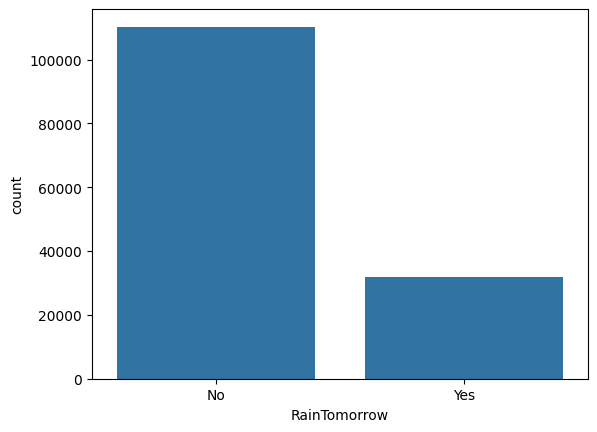

In [12]:
sns.countplot(x="RainTomorrow", data=df)

## 상관 분석(Correlation Analysis) 수행해보기
### 수치형 데이터 확인

In [13]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [14]:
temp_df = df[num_cols]
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


### 범주형 데이터를 수치형으로 변환
- RainToday, RainTomorrow 컬럼의 데이터를 수치형으로 변환
- 변환하여 수치형 데이터 프레임에 추가

In [15]:
# Yes/No 값을 0, 1로 변경하기
temp_df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')
temp_df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')

In [16]:
temp_df.shape

(145460, 18)

In [17]:
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


## 상관관계 계수 확인 

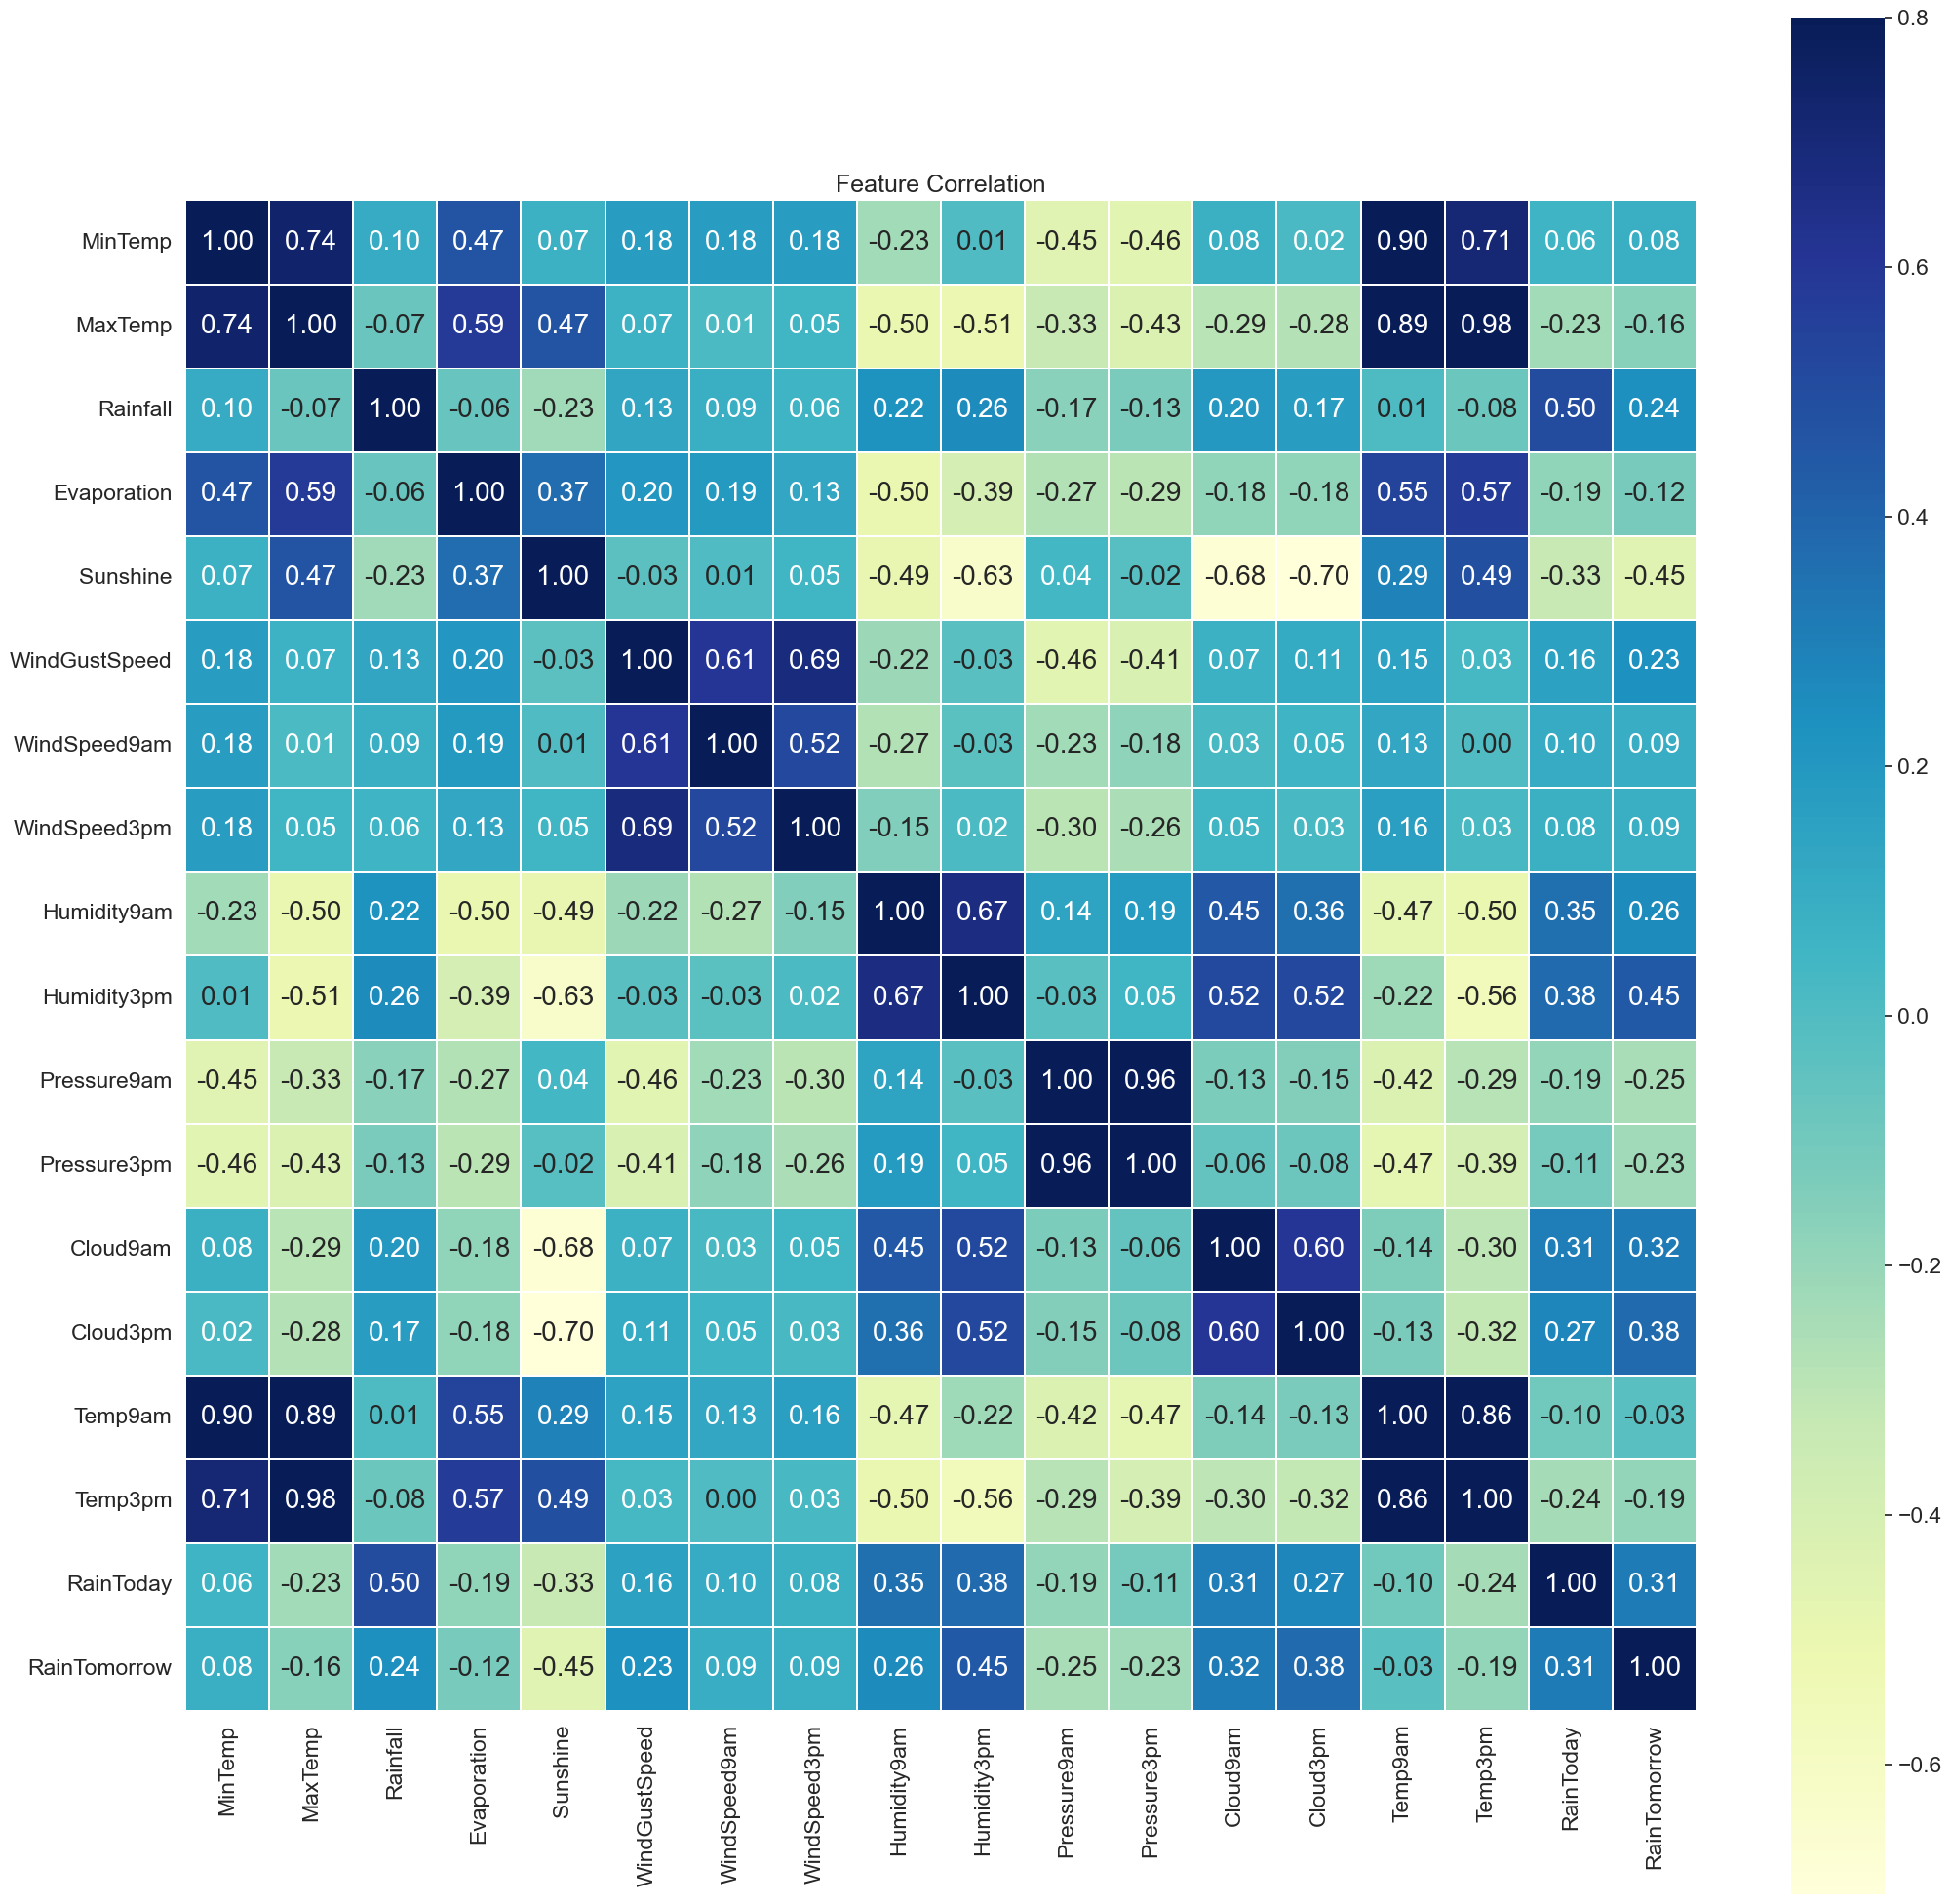

In [18]:
corr = temp_df.corr()
plt.figure(figsize=(25, 25));
sns.set(font_scale=1.5); # plot의 글자크기 설정
sns.heatmap(corr,
            vmax=0.8,
            #vmin=-1,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = '.2f', # annot의 출력 소숫점 자리 지정
            annot_kws={"size": 20},
            cmap='YlGnBu');
plt.title('Feature Correlation');

In [19]:
corr.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
# RainTomorrow와 상관관계가 있는 feature 살펴보기
# Rainfall,'Evaporation', Sunshine, WindGustSpeed','Humidity9am', ' 'Pressure9am', 
# 'Pressure3pm', Cloud9am, Cloud3pm

# outlier 분석

<Axes: ylabel='Sunshine'>

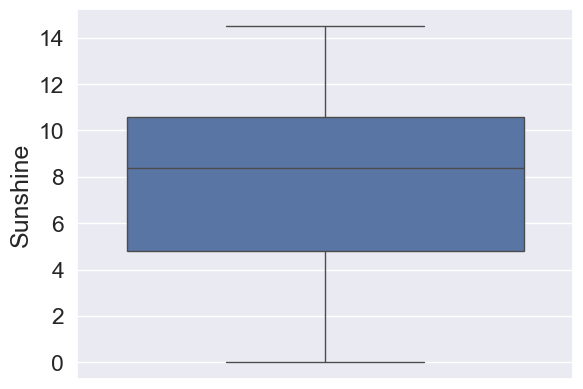

In [21]:
sns.boxplot(data=df, y='Sunshine')

In [22]:
df.shape

(145460, 23)

### categorical / numerical column 리스트 추출

In [24]:
print(cat_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [25]:
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


## [문제해결] 숫자형 컬럼을 boxplot()으로 시각화

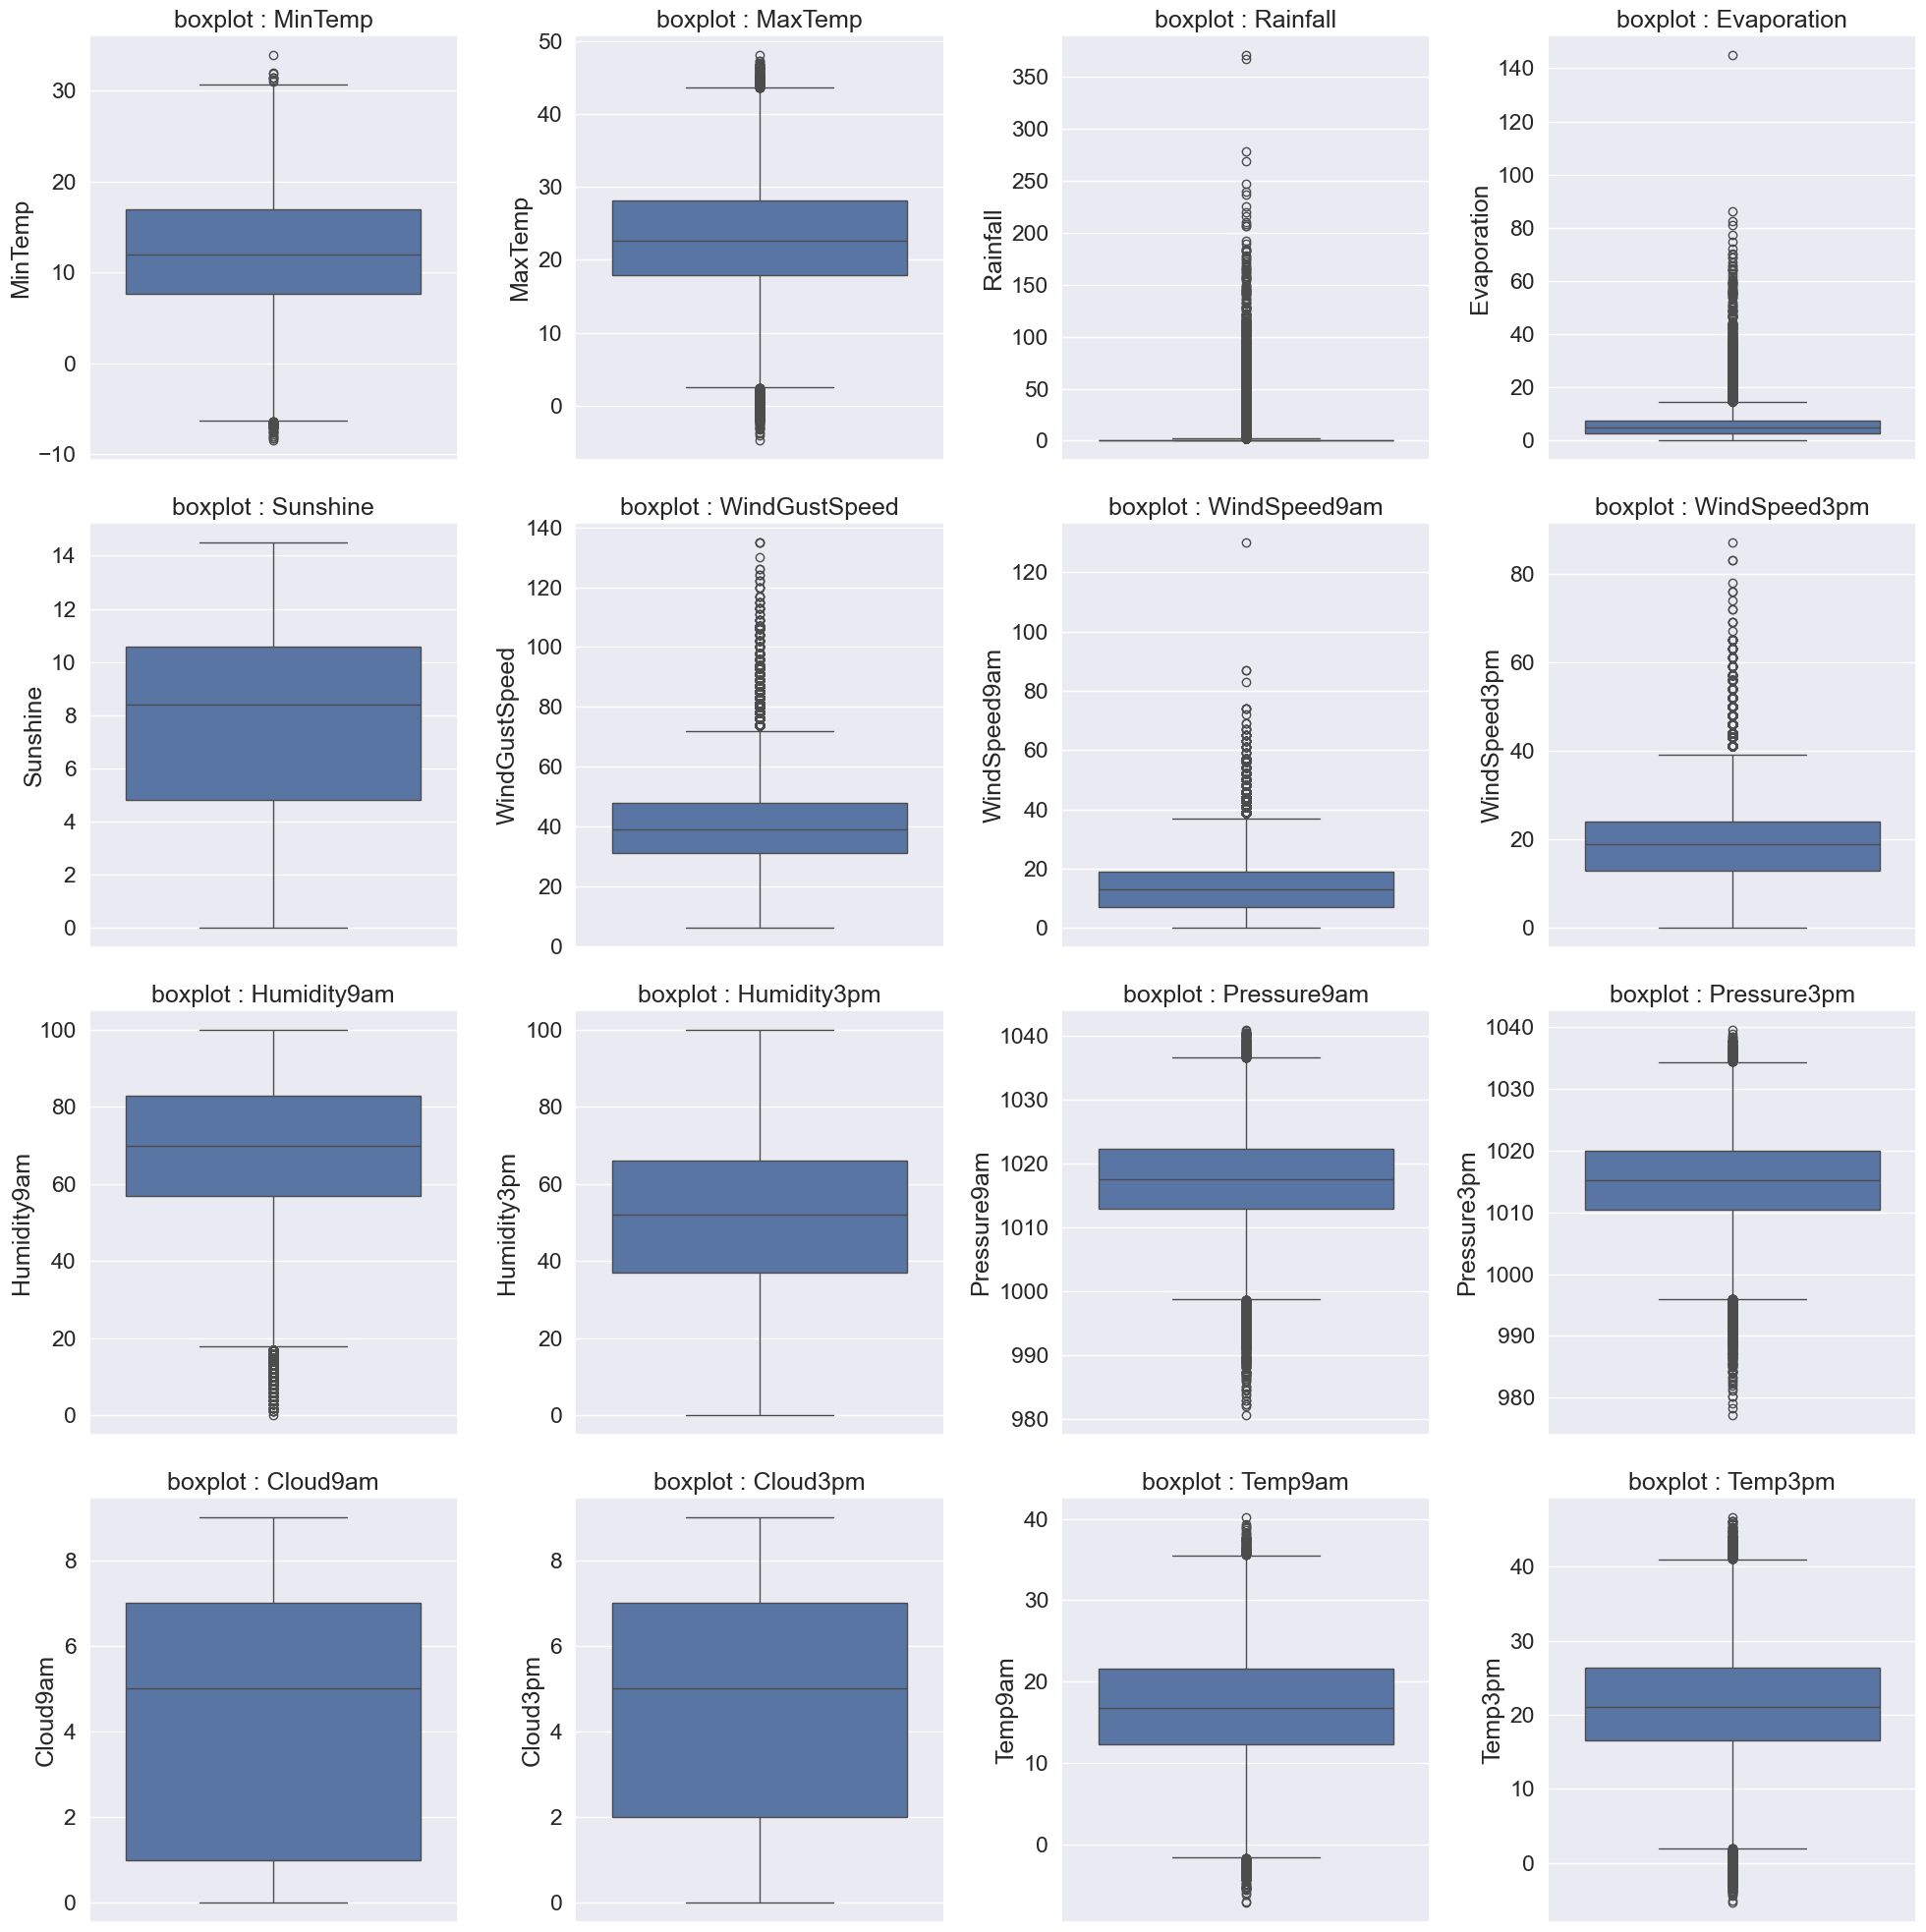

In [26]:
# 4x4 fig로 각 fearture들 데이터 분포, 이상치 확인

nrows, ncols = 4, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20) 
# print(axs.shape)
axs = axs.flatten()  # axs 2D -> 1D
for i, col in enumerate(num_cols): 
  # print(i, col)
  ax = sns.boxplot(data=df, y=col, ax=axs[i]) 
  ax.set_title("boxplot : " + col)


plt.tight_layout()

📊 Boxplot에서 확인할 수 있는 것들
각 plot은 해당 변수의 분포를 요약하여 보여줍니다:

중앙값 (Median): 박스 안의 가로 선

사분위 범위 (IQR, Interquartile Range): 박스 자체가 1사분위수(Q1) ~ 3사분위수(Q3) 범위

이상치 (Outliers): 박스에서 멀리 떨어진 점들 (1.5 * IQR 이상 차이 나는 값)

분포의 치우침(Skewness): 박스나 수염이 한쪽으로 치우쳐 있을 경우

🧠 이 코드로 알 수 있는 인사이트
어떤 feature는 값의 분포가 넓은지/좁은지

이상치가 많은 변수가 무엇인지

분포가 비대칭인 변수가 있는지

데이터 전처리 시 이상치 제거가 필요한 feature|

In [27]:
df['Rainfall'].max()

np.float64(371.0)

In [28]:
df['Rainfall'].mean()

np.float64(2.3609181499166656)

In [29]:
df['Rainfall'].median()

np.float64(0.0)

In [30]:
df.shape

(145460, 23)

### Rainfall 컬럼에서 0이 아닌것만 필터링

In [31]:
filtered_rainfall = df.query('Rainfall != 0.0').copy()

In [32]:
filtered_rainfall.shape

(54380, 23)

In [33]:
filtered_rainfall.index

Index([     0,      4,      5,      9,     11,     12,     13,     15,     17,
           18,
       ...
       145323, 145324, 145325, 145326, 145336, 145391, 145392, 145393, 145394,
       145429],
      dtype='int64', length=54380)

In [34]:
filtered_rainfall.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No


### 이상치 확인하는 함수

In [35]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


In [36]:
# 이상치 확인하는 함수
def get_outlier_indices(data, columns):
    outlier_indices = []   # 이상치에 해당하는 행의 목록 리스트
    for column in columns:
        Q1 = data[column].quantile(0.25) # 25%분위수(1Q)
        Q3 = data[column].quantile(0.75) # 75%분위수(3Q)
        IQR = Q3 - Q1
        min_value = Q1 - 1.5*IQR
        max_value = Q3 + 1.5*IQR
        filter = ((data[column] < min_value) | (data[column] > max_value))  # | = or의 의미
        
        outlier_data = data[column][filter]
        outlier_index = outlier_data.index
        outlier_indices.extend(outlier_index)

    return outlier_indices

In [37]:
# Rainfall 컬럼의 이상치에 해당하는 모든 row 데이터 idex 값을 추출
print('dataframe before removing outlier (Rainfall column) :', df.shape)
delete_indices = get_outlier_indices(filtered_rainfall, ['Rainfall'])
# print(delete_indices)

dataframe before removing outlier (Rainfall column) : (145460, 23)


In [39]:
# Rainfall 의 이상치 삭제
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (Rainfall column) :', df.shape)

dataframe after removing outlier (Rainfall column) : (140240, 23)


In [40]:
# 'Humidity9am','Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm' 이상치 제거
print('dataframe before removing outlier (etc) :', df.shape)
delete_indices = get_outlier_indices(df, ['Humidity9am','Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm'])

dataframe before removing outlier (etc) : (140240, 23)


In [41]:
# 컬럼에서 추출한 이상치를 삭제하기
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (etc) :', df.shape)

dataframe after removing outlier (etc) : (133529, 23)


 ### 이상치 제거 후 boxplot으로 확인 

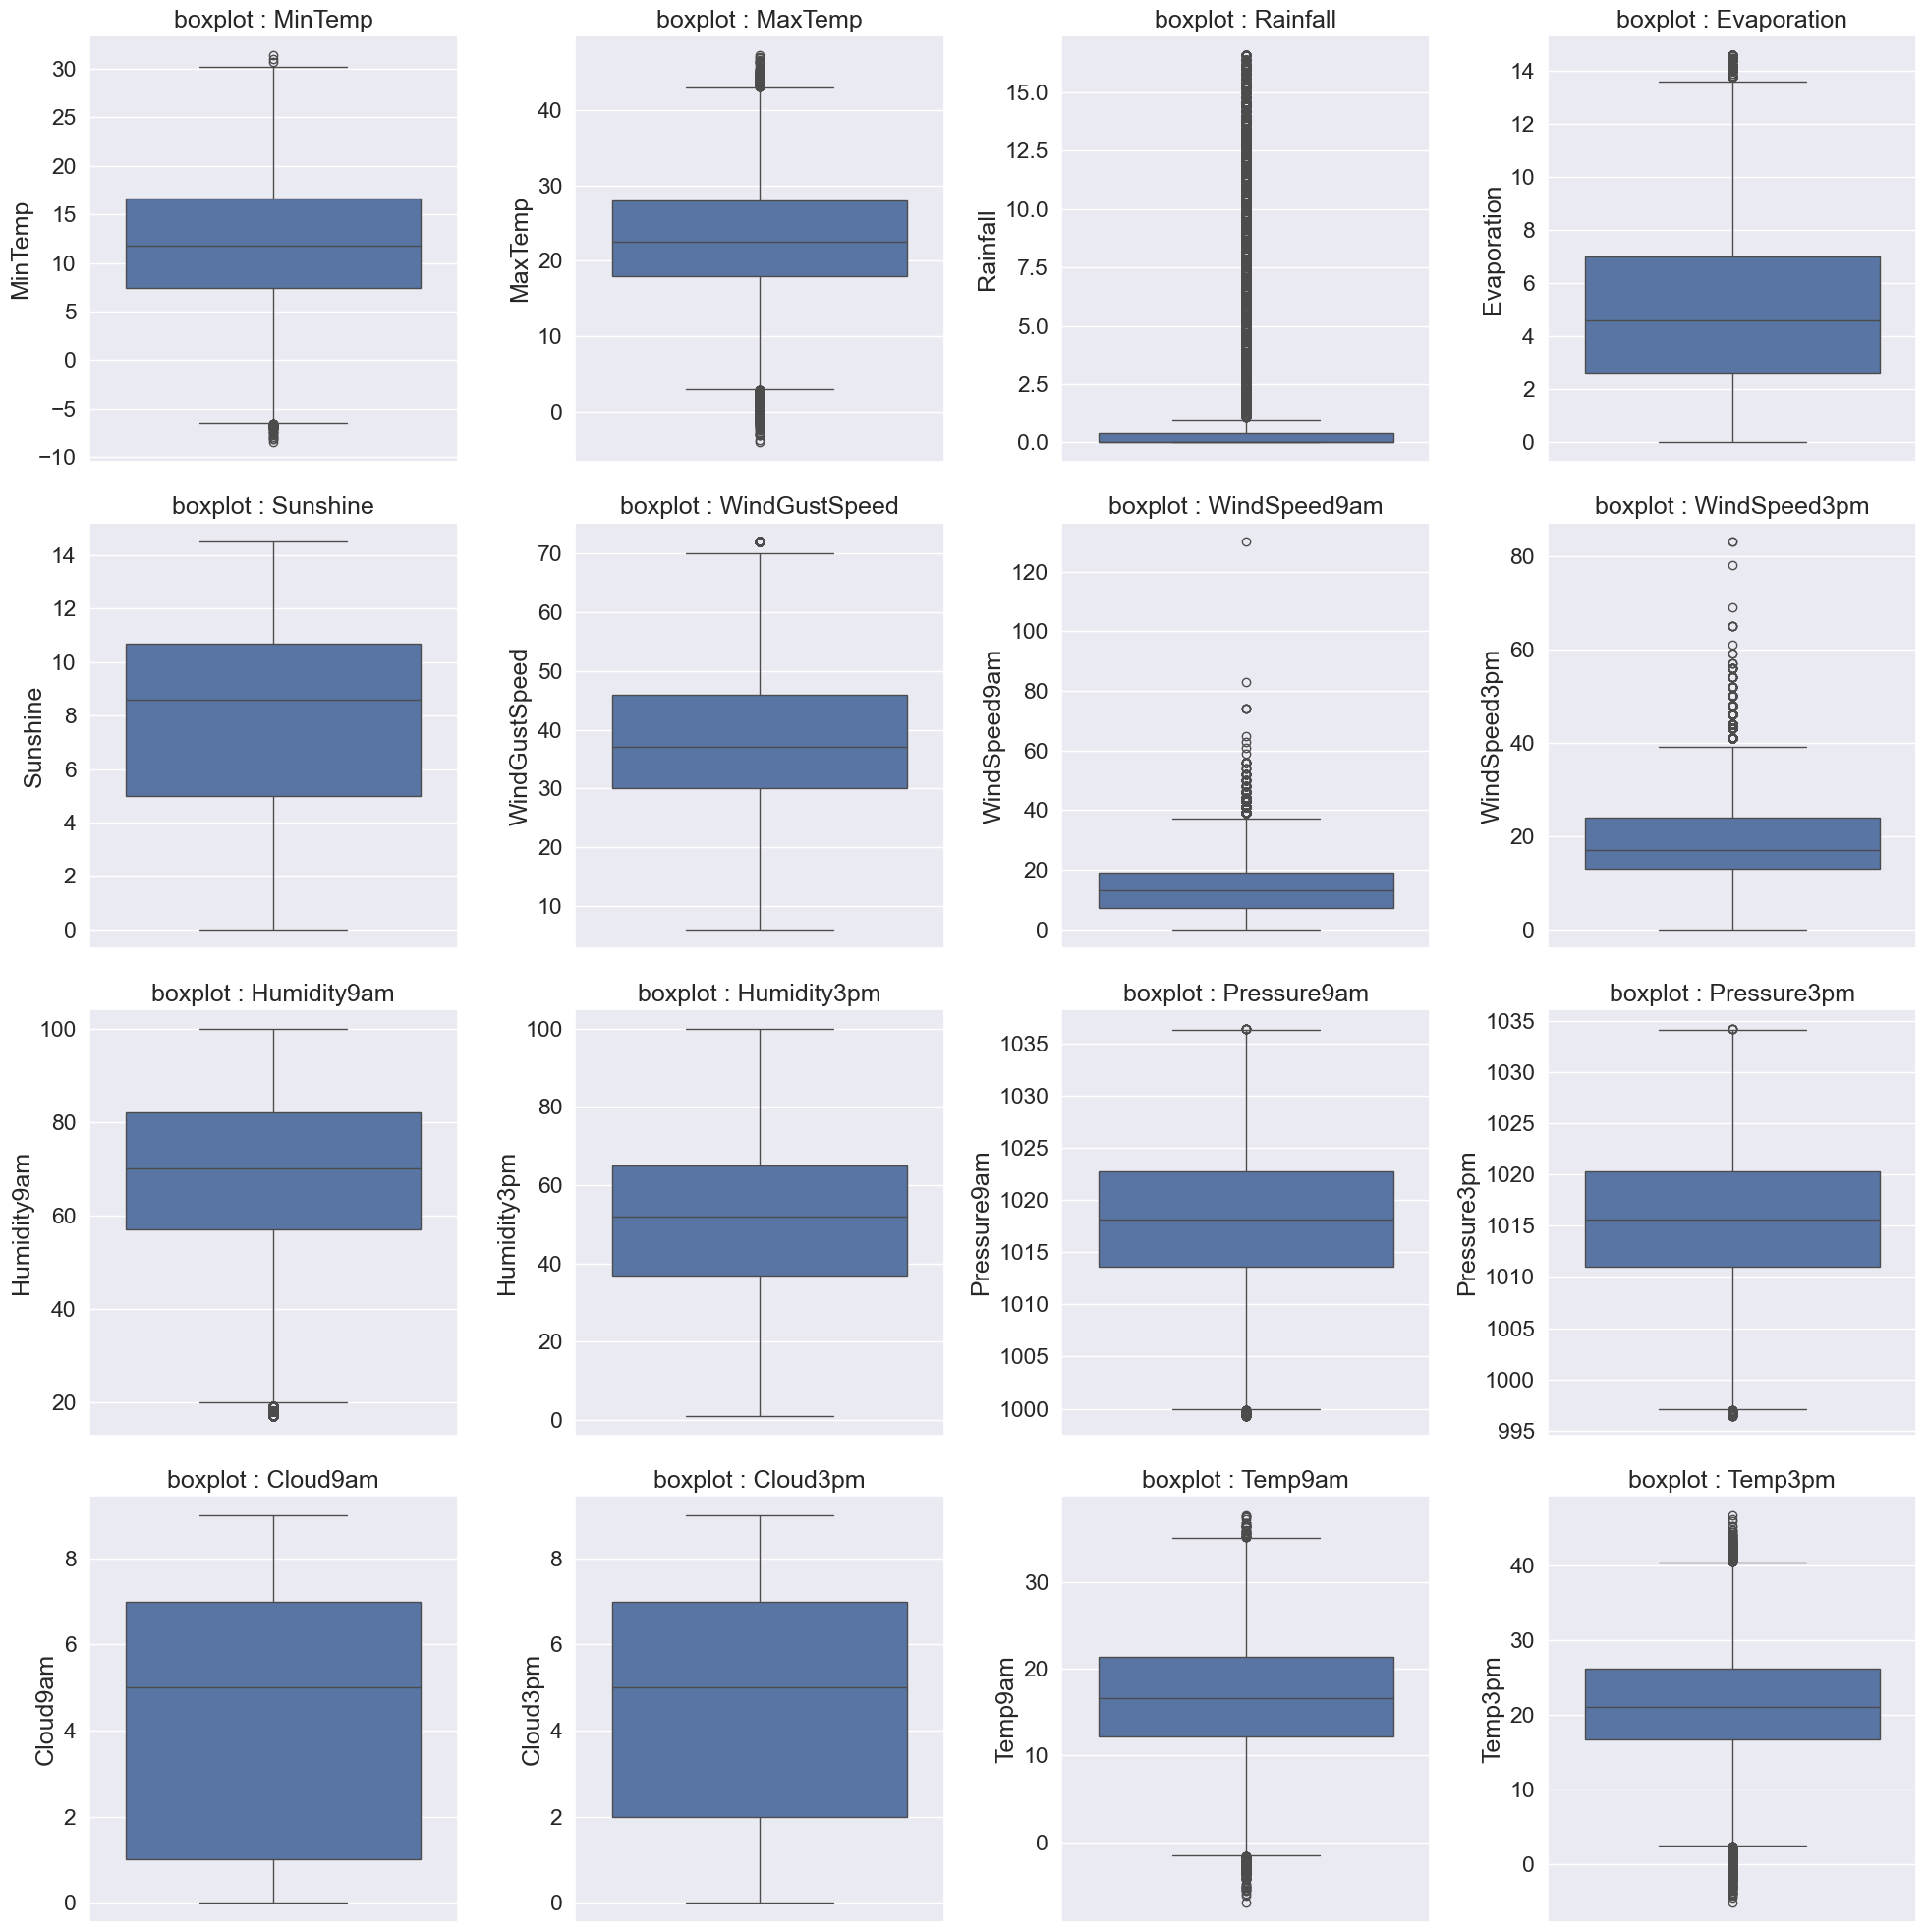

In [42]:
nrows, ncols = 4, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20) 

axs = axs.flatten()  # axs 2D -> 1D
for i, col in enumerate(num_cols): 
  ax = sns.boxplot(data=df, y=col, ax=axs[i]) 
  ax.set_title("boxplot : " + col)

plt.tight_layout()

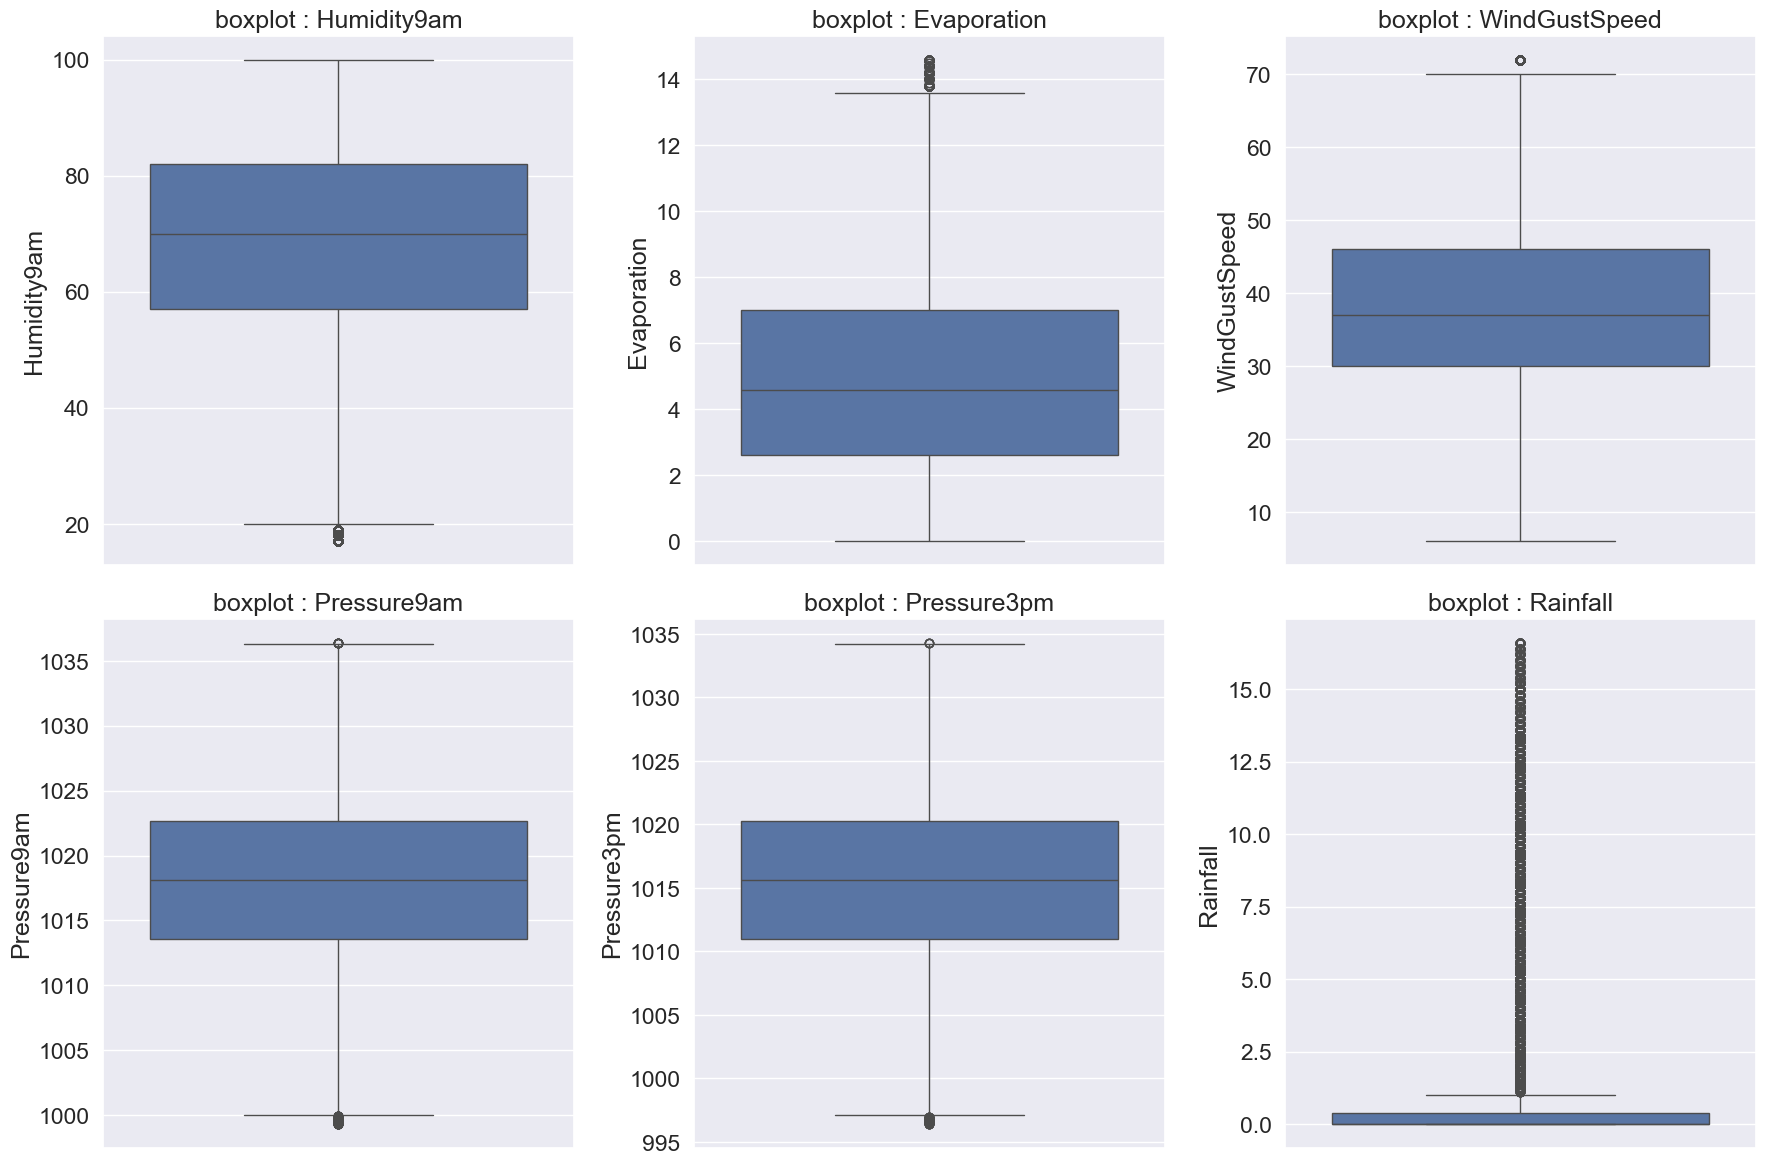

In [53]:
# nrows, ncols = 2,3
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
# fig.set_size_inches(20,20) 

# axs = axs.flatten()  # axs 2D -> 1D
# for i, col in enumerate(df[col]): 
#   ax = sns.boxplot(data=df, y=col, ax=axs[i]) 
#   ax.set_title("boxplot : " + col)

# plt.tight_layout()

import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 제거한 컬럼만 박스플롯 생성
selected_cols = ['Humidity9am', 'Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm','Rainfall']

nrows, ncols = 2, 3  # 5개의 컬럼이므로 2행 3열 정도로 설정
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(18, 12)

axs = axs.flatten()  # 2D -> 1D 전개하여 반복문에 사용
for i, col in enumerate(selected_cols): 
    ax = sns.boxplot(data=df, y=col, ax=axs[i]) 
    ax.set_title("boxplot : " + col)

# # 사용되지 않은 subplot은 숨기기 (6개 중 5개만 사용)
# for j in range(len(selected_cols), len(axs)):
#     fig.delaxes(axs[j])  # 남는 subplot 제거

plt.tight_layout()
plt.show()


## 결측치(null값) 확인 및 처리하기

In [54]:
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
RainTomorrow     0.022744
RainToday        0.023478
Rainfall         0.023478
Temp3pm          0.025058
WindDir3pm       0.029829
Humidity3pm      0.031282
WindGustSpeed    0.072786
WindGustDir      0.073220
WindDir9am       0.075931
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

## categorical / numerical column 확인하기

In [57]:
print(cat_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [58]:
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


## 결측치 개수 확인하기 

In [60]:
# categorical column의 null 비율
df[cat_columns].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainTomorrow    0.022744
RainToday       0.023478
WindDir3pm      0.029829
WindGustDir     0.073220
WindDir9am      0.075931
dtype: float64

In [61]:
# numerical column의 null 비율
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
Rainfall         0.023478
Temp3pm          0.025058
Humidity3pm      0.031282
WindGustSpeed    0.072786
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

In [62]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치를 채움
for col in num_cols:
    if df[col].isnull().mean()>0:
        col_median=df[col].median()
        df[col] = df[col].fillna(col_median)

In [63]:
for col in num_cols:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

In [64]:
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [65]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [66]:
# 날짜 column을 drop합니다.
df = df.drop(['Date'], axis=1)

In [67]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [68]:
df.isnull().mean().sort_values()

Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RainTomorrow     0.022744
dtype: float64

In [69]:
df.shape

(133529, 22)

In [70]:
# RainTomorrow 컬럼을 기준으로 nan인 행을 삭제하기
df = df.dropna(subset=['RainTomorrow'])
df['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
133523    No
133524    No
133525    No
133526    No
133527    No
Name: RainTomorrow, Length: 130492, dtype: object

In [71]:
df.isnull().mean().sort_values()

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [72]:
df.shape

(130492, 22)

## yes.no 값에 대한 변환

In [73]:
# Yes/No 값을 0, 1로 변경하기
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})

categorial value 에 one hot encoding 적용하기 

In [74]:
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [75]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [76]:
df.shape

(130492, 115)

## 트레이닝 데이터 준비

In [77]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [78]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [79]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

## ML학습, 테스트, 평가

- 내일 비가 올지 안올지 예측해보기
- 학습기 : Random forest

### ML학습 

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('랜덤 포레스트(Random Forest) Accuracy (After removing Outlier):', score)

랜덤 포레스트(Random Forest) Accuracy (After removing Outlier): 0.8585386413272539


### ML 모델 평가 

In [83]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     20784
           1       0.77      0.43      0.56      5315

    accuracy                           0.86     26099
   macro avg       0.82      0.70      0.74     26099
weighted avg       0.85      0.86      0.84     26099



xgboost로 모델 만들고 평가하기 

In [84]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.8624851526878424


In [85]:
# 레포트
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     20784
           1       0.74      0.51      0.60      5315

    accuracy                           0.86     26099
   macro avg       0.81      0.73      0.76     26099
weighted avg       0.85      0.86      0.85     26099



## LGBM 분류기

In [87]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

[LightGBM] [Info] Number of positive: 21257, number of negative: 83136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 104393, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203625 -> initscore=-1.363792
[LightGBM] [Info] Start training from score -1.363792
accuracy : 0.8594965324341929


## [문제해결]
- 이상치 제거
- y와의 상관계수 > |0.2|컬럼만 사용